In [21]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
import math
import dnn_utils

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

[[0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1
  1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0
  1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0
  1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0
  0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0
  1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1]]


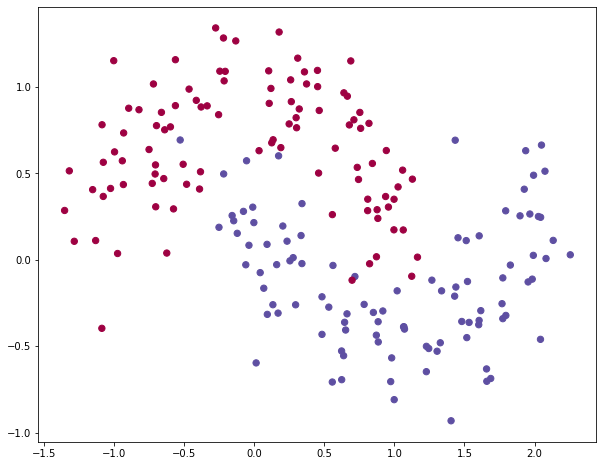

In [45]:
# Generate 2 moon-shaped datasets with different colors for each one.
# And then adding noise so that they're more randomized
np.random.seed(0)
X, Y = sklearn.datasets.make_moons(200, noise=0.20)
Y = Y.reshape((1, 200))
print(Y)
X = X.T
plt.scatter(X[0,:], X[1,:], s=40, c=Y[0,:], cmap=plt.cm.Spectral)

In [46]:
shape_X = X.shape
shape_Y = Y.shape
# m is number of training elements
m = X.shape[1]
print(shape_X)
print(shape_Y)
print(m)

(2, 200)
(1, 200)
200


In [47]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - .5, X[0, :].max() + .5
    y_min, y_max = X[1, :].min() - .5, X[1, :].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[0, :], X[1, :], c=Y[0,:], cmap=plt.cm.Spectral)

Accuracy of logistic regression: 70%


/Users/romanmineyev/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/romanmineyev/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


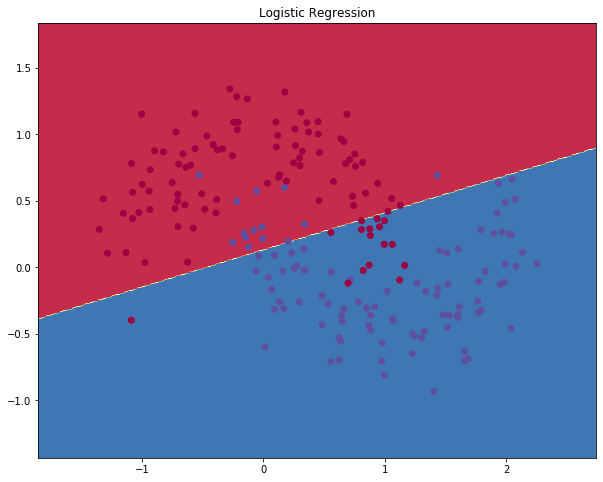

In [48]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T)
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

predictions = clf.predict(X.T)
accuracy = (100 - np.sum(abs(Y[0,:] - predictions), axis=0))
print("Accuracy of logistic regression: " + str(accuracy) + "%")

In [49]:
def predict(parameters, X):
    cache = forward_prop(parameters, X, lambda x: np.tanh(x))
    A2 = cache["A2"]
    predictions = np.rint(A2)
    
    return predictions

In [50]:
def plot_decision_boundary_nn(model, X, Y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=Y[0, :], cmap=plt.cm.Spectral)
    

In [53]:
test_model = dnn_utils.Network([2, 3, 1])

cost after 100 iterations: 0.1438009194350649
cost after 200 iterations: 0.1166319802255034
cost after 300 iterations: 0.10905150523265311
cost after 400 iterations: 0.10592316175605966
cost after 500 iterations: 0.1044178459918296
cost after 600 iterations: 0.10363682024853722
cost after 700 iterations: 0.10321211051276558
cost after 800 iterations: 0.1029698267204272
cost after 900 iterations: 0.10282179186039658
cost after 1000 iterations: 0.10272210029525015
cost after 1100 iterations: 0.1026468987543078
cost after 1200 iterations: 0.10258407138579158
cost after 1300 iterations: 0.1025277101979022
cost after 1400 iterations: 0.10247509809695914
cost after 1500 iterations: 0.10242507817415927
cost after 1600 iterations: 0.10237720103077606
cost after 1700 iterations: 0.1023313028195323
cost after 1800 iterations: 0.10228731249475301
cost after 1900 iterations: 0.10224517385735495
cost after 2000 iterations: 0.10220482049626092
cost after 2100 iterations: 0.10216617232133636
cost aft

cost after 17700 iterations: 0.023030539612345392
cost after 17800 iterations: 0.02295447020547159
cost after 17900 iterations: 0.02288006679211283
cost after 18000 iterations: 0.022807276159979465
cost after 18100 iterations: 0.02273604744158791
cost after 18200 iterations: 0.022666331985032113
cost after 18300 iterations: 0.022598083233132407
cost after 18400 iterations: 0.022531256610349003
cost after 18500 iterations: 0.02246580941689685
cost after 18600 iterations: 0.02240170072954276
cost after 18700 iterations: 0.022338891308607455
cost after 18800 iterations: 0.022277343510731108
cost after 18900 iterations: 0.022217021206996607
cost after 19000 iterations: 0.022157889706035307
cost after 19100 iterations: 0.02209991568176947
cost after 19200 iterations: 0.022043067105471104
cost after 19300 iterations: 0.0219873131818424
cost after 19400 iterations: 0.021932624288844186
cost after 19500 iterations: 0.021878971921019907
cost after 19600 iterations: 0.02182632863608119
cost afte

'\nestimates_plot = np.reshape(test_model.train_AL, (test_model.train_AL.shape[1]))\nprint(estimates_plot)\nplot_decision_boundary_nn(estimates_plot, X, Y)\nplt.title("Decision Boundary for hidden layer size 3")\n\n'

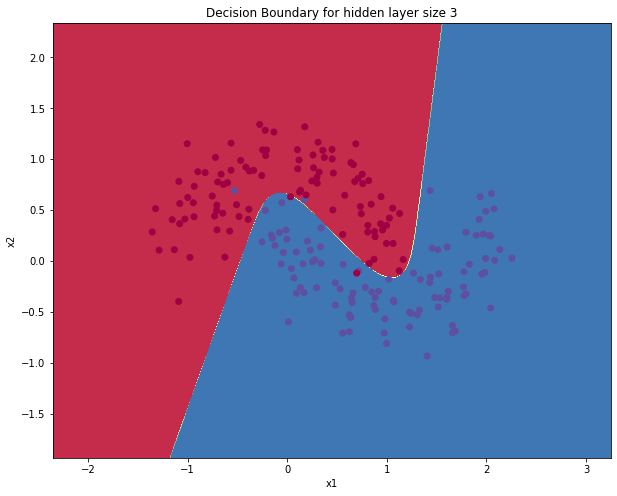

In [54]:
test_model.train_model(X, Y, 20000, 3)

x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

test_model.predict(np.c_[xx.ravel(), yy.ravel()].T)

'''
for i in range(test_model.predict_AL.shape[1]):
    print(test_model.predict_AL[0][i])
'''

estimates_for_plot = np.ones_like(test_model.predict_AL)
estimates_for_plot[test_model.predict_AL < 0.5] = 0

#estimates_for_plot = np.reshape(test_model.test_vectorized_estimates, (test_model.test_vectorized_estimates.shape[1]))



estimates_for_plot = estimates_for_plot.reshape(xx.shape)
plt.contourf(xx, yy, estimates_for_plot, cmap=plt.cm.Spectral)
plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(X[0, :], X[1, :], c=Y[0, :], cmap=plt.cm.Spectral)

plt.title("Decision Boundary for hidden layer size 3")

'''
estimates_plot = np.reshape(test_model.train_AL, (test_model.train_AL.shape[1]))
print(estimates_plot)
plot_decision_boundary_nn(estimates_plot, X, Y)
plt.title("Decision Boundary for hidden layer size 3")

'''

In [19]:
print(xx.shape)

(428, 561)


In [20]:
print(estimates_for_plot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
